In [2]:
# Useful Libraries
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

In [3]:
# Useful Functions
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples
    
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples
    
def factorial(n):return reduce(lambda x,y:x*y,[1]+range(1,n+1))

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 7.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

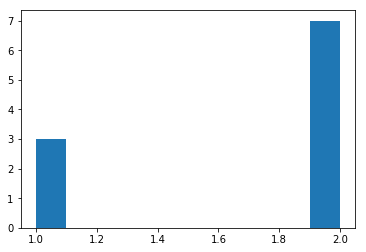

In [15]:
#1
res = np.random.randint(1,3, 10)

plt.hist(res, align='mid')

(array([499729.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 500271.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

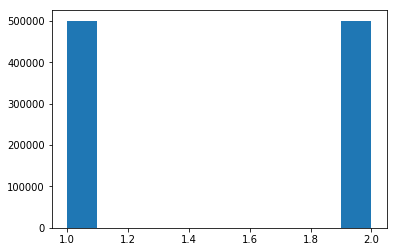

In [16]:
res = np.random.randint(1,3, 1000000)

plt.hist(res, align='mid')

(array([3.11900e+03, 2.13160e+04, 6.71960e+04, 1.34041e+05, 1.89676e+05,
        2.02111e+05, 1.68808e+05, 1.12490e+05, 6.04680e+04, 2.69650e+04,
        9.88600e+03, 2.99200e+03, 7.30000e+02, 1.63000e+02, 3.60000e+01,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

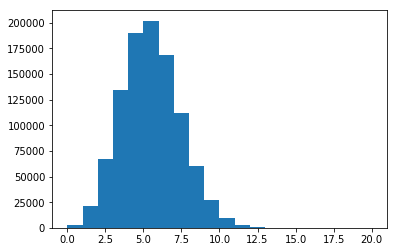

In [27]:
#2
results = np.random.binomial(20, .25, 1000000)
plt.hist(results, bins=range(0,21,1))

In [28]:
import scipy.stats as stats

In [34]:
print("mode", stats.mode(results).mode[0])
print("probability of getting mode ", stats.mode(results).count[0]/1000000)

mode 5
probability of getting mode  0.202111


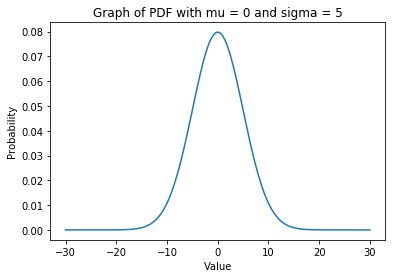

In [35]:
# Graphing a normal distribution pdf. 
mu = 0
sigma = 5
x = np.linspace(-30, 30, 200)
y = stats.norm(mu, sigma).pdf(x)
plt.plot(x, y)
plt.title('Graph of PDF with mu = 0 and sigma = 5')
plt.xlabel('Value')
plt.ylabel('Probability');

[-0.0898524  -0.07216058 -0.05446877 -0.03677695 -0.01908513 -0.00139332
  0.0162985   0.03399032  0.05168213  0.06937395  0.08706576] 0.001368673955170392 0.029733785696289844
[ 0.12129204  0.63056913  2.300797    5.89208601 10.59022122 13.35937577
 11.82803166  7.34994299  3.20553587  0.98121119  0.21079947]


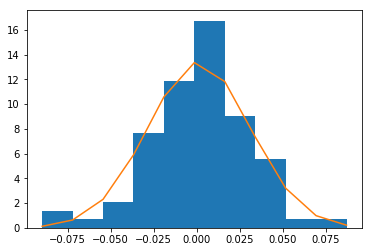

In [60]:
prices = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2016,1,1), end=datetime(2016,5,1)).iloc[:, -1]
returns = prices.pct_change()[1:]

mu = np.mean(returns)
sigma = np.std(returns)

_, bins, _ = plt.hist(returns,  density = True)
print(bins, mu,sigma)
normdist = stats.norm(mu, sigma).pdf(bins)
print(normdist)
plt.plot(bins, normdist)

In [63]:
import statsmodels.stats as stats
_, p_value,skewness,kurtosis = scipy.stats.jarque_bera(returns)

print(p_value, skewness, kurtosis)

NameError: name 'scipy' is not defined